In [105]:
# Load everything that may be needed
import numpy as np
import copy
import matplotlib.pyplot as plt
import h5py
import scipy
import imageio
import cv2 
import os
from PIL import Image
from scipy import ndimage
from scipy import misc

In [73]:
# To store the Paths
train_messy = "images/train/messy"
train_clean= "images/train/clean"
test_messy= "images/val/messy"
test_clean= "images/val/clean"

In [74]:
def load_dataset():
    
    train_set_x_orig_list,train_set_y_list, test_set_x_orig_list, test_set_y_list=[],[],[],[]

    for image in (os.listdir(train_messy)): 
        path = os.path.join(train_messy, image)
        img = cv2.imread(path) 
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        train_set_x_orig_list.append(img)
        train_set_y_list.append(0)

    for image in (os.listdir(train_clean)): 
        path = os.path.join(train_clean, image)
        img = cv2.imread(path) 
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        train_set_x_orig_list.append(img)
        train_set_y_list.append(1)

    for image in (os.listdir(test_messy)): 
        path = os.path.join(test_messy, image)
        img = cv2.imread(path) 
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        test_set_x_orig_list.append(img)
        test_set_y_list.append(0)

    for image in (os.listdir(test_clean)): 
        path = os.path.join(test_clean, image)
        img = cv2.imread(path) 
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        test_set_x_orig_list.append(img)
        test_set_y_list.append(1)

    train_set_x_orig=np.array(train_set_x_orig_list)
    train_set_y=np.array(train_set_y_list)
    train_set_y=train_set_y.reshape((1,train_set_y.shape[0]))

    test_set_x_orig=np.array(test_set_x_orig_list)
    test_set_y=np.array(test_set_y_list)
    test_set_y=test_set_y.reshape((1,test_set_y.shape[0]))

    classes_list=[b'messy',b'clean']
    classes=np.array(classes_list)
    
    return train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes

In [75]:
train_set_x_orig, train_set_y, test_set_x_orig, test_set_y,classes=load_dataset()

y = [1], it's a 'clean' picture.


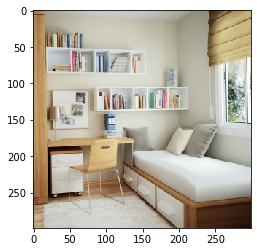

In [76]:
index = 100
plt.imshow(train_set_x_orig[index])
print ("y = " + str(train_set_y[:, index]) + ", it's a '" + classes[np.squeeze(train_set_y[:, index])].decode("utf-8") +  "' picture.")

In [77]:
m_train = train_set_x_orig.shape[0]
m_test = test_set_x_orig.shape[0]
num_px = train_set_x_orig.shape[1]

print ("Number of training examples: m_train = " + str(m_train))
print ("Number of testing examples: m_test = " + str(m_test))
print ("Height/Width of each image: num_px = " + str(num_px))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_set_x shape: " + str(train_set_x_orig.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x shape: " + str(test_set_x_orig.shape))
print ("test_set_y shape: " + str(test_set_y.shape))

Number of training examples: m_train = 192
Number of testing examples: m_test = 20
Height/Width of each image: num_px = 299
Each image is of size: (299, 299, 3)
train_set_x shape: (192, 299, 299, 3)
train_set_y shape: (1, 192)
test_set_x shape: (20, 299, 299, 3)
test_set_y shape: (1, 20)


In [78]:
train_set_x_flatten = train_set_x_orig.reshape(train_set_x_orig.shape[0], num_px*num_px*3).T
test_set_x_flatten = test_set_x_orig.reshape(test_set_x_orig.shape[0], -1).T
print ("train_set_x_flatten shape: " + str(train_set_x_flatten.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x_flatten shape: " + str(test_set_x_flatten.shape))
print ("test_set_y shape: " + str(test_set_y.shape))
print ("sanity check after reshaping: " + str(train_set_x_flatten[0:5,0]))

train_set_x_flatten shape: (268203, 192)
train_set_y shape: (1, 192)
test_set_x_flatten shape: (268203, 20)
test_set_y shape: (1, 20)
sanity check after reshaping: [207 218 224 207 216]


In [79]:
train_set_x = train_set_x_flatten/255.
test_set_x = test_set_x_flatten/255.
print('number of train datasets =' + str(train_set_x.shape))
print('number of test datasets =' + str (test_set_x.shape))

number of train datasets =(268203, 192)
number of test datasets =(268203, 20)


In [80]:
print('% of Messy in the training data: ', 100*np.sum(train_set_y == 0)/len(train_set_y[0]))
print('% of Clean in the training data: ', 100*np.sum(train_set_y == 1)/len(train_set_y[0]))

% of Messy in the training data:  50.0
% of Clean in the training data:  50.0


In [81]:
def sigmoid(z):
    s = 1/(1+np.exp(-z))
    return s

In [82]:
print ("sigmoid(0) = " + str(sigmoid(0)))
print ("sigmoid(9.2) = " + str(sigmoid(9.2)))
print ("sigmoid([0, 2]) = " + str(sigmoid(np.array([0,2]))))

sigmoid(0) = 0.5
sigmoid(9.2) = 0.9998989708060922
sigmoid([0, 2]) = [0.5        0.88079708]


In [83]:
def initialize_with_zeros(dim):
    w = np.zeros((dim,1))
    b = 0.
    return w, b

In [84]:
dim = 2
w, b = initialize_with_zeros(dim)
print ("w = " + str(w))
print ("b = " + str(b))

w = [[0.]
 [0.]]
b = 0.0


In [85]:
def propagate(w, b, X, Y):
    m = X.shape[1]
    
    A = sigmoid(np.dot(w.T,X)+b)
    A = A.astype(np.float64)
    cost = -1/m*np.sum(np.nan_to_num(Y*np.log(A)+(1-Y)*np.log(1-A)),axis=1)
    
    dw = 1/m*np.dot(X,(A-Y).T)
    db = 1/m*np.sum(A-Y)
    
    cost = np.squeeze(np.array(cost))

    grads = {"dw": dw,
             "db": db}
    
    return grads, cost

In [86]:
w, b, X, Y = np.array([[1], [2]]), 2, np.array([[1,2], [3,4]]), np.array([[1, 0]])
grads, cost = propagate(w, b, X, Y)
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))
print ("cost = " + str(cost))

dw = [[0.99993216]
 [1.99980262]]
db = 0.49993523062470574
cost = 6.000064773192205


In [87]:
def optimize(w, b, X, Y, num_iterations=100, learning_rate=0.009, print_cost=False):
    
    w = copy.deepcopy(w)
    b = copy.deepcopy(b)
    
    costs = []
    
    for i in range(num_iterations):
        
        grads, cost = propagate(w,b,X,Y)
        
        dw = grads["dw"]
        db = grads["db"]
        
        w = w-learning_rate*dw
        b = b-learning_rate*db
        
        if i % 100 == 0:
            costs.append(cost)
            if print_cost:
                print ("Cost after iteration %i: %f" %(i, cost))
    
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs

In [88]:
params, grads, costs = optimize(w, b, X, Y, num_iterations= 100, learning_rate = 0.009, print_cost = False)

print ("w = " + str(params["w"]))
print ("b = " + str(params["b"]))
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))

w = [[0.1124579 ]
 [0.23106775]]
b = 1.5593049248448891
dw = [[0.90158428]
 [1.76250842]]
db = 0.4304620716786828


In [89]:
def predict(w, b, X):
    m = X.shape[1]
    Y_prediction = np.zeros((1, m))
    w = w.reshape(X.shape[0], 1)

    A = sigmoid(np.dot(w.T,X)+b)
        
    for i in range(A.shape[1]):
        if A[0,i]<=0.5:
            Y_prediction[0,i]=0
        else:
            Y_prediction[0,i]=1
    return Y_prediction

In [90]:
print("predictions = " + str(predict(w, b, X)))

predictions = [[1. 1.]]


In [91]:
def model(X_train, Y_train, X_test, Y_test, num_iterations=2000, learning_rate=0.5, print_cost=False):
   
    w, b = initialize_with_zeros(X_train.shape[0])
    parameters, grads, costs = optimize(w,b,X_train,Y_train,num_iterations,learning_rate,print_cost)
    w = parameters["w"]
    b = parameters["b"]
    Y_prediction_test = predict(w,b,X_test)
    Y_prediction_train = predict(w,b,X_train)
    
    if print_cost:
        print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
        print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))

    
    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d

In [97]:
#logistic_regression_model = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations=1500, learning_rate=0.01, print_cost=True)
d = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 1500, learning_rate = 0.01, print_cost = True)

Cost after iteration 0: 0.693147


C:\Users\91865\anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  
C:\Users\91865\anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in multiply
  


Cost after iteration 100: inf
Cost after iteration 200: inf
Cost after iteration 300: inf
Cost after iteration 400: 0.082285
Cost after iteration 500: 0.000326
Cost after iteration 600: 0.000218
Cost after iteration 700: 0.000170
Cost after iteration 800: 0.000142
Cost after iteration 900: 0.000122
Cost after iteration 1000: 0.000108
Cost after iteration 1100: 0.000097
Cost after iteration 1200: 0.000088
Cost after iteration 1300: 0.000081
Cost after iteration 1400: 0.000075
train accuracy: 100.0 %
test accuracy: 60.0 %


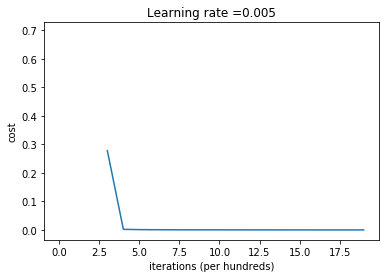

In [94]:
# Plot learning curve (with costs)
costs = np.squeeze(d['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(d["learning_rate"]))
plt.show()

learning rate is: 0.01


C:\Users\91865\anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  
C:\Users\91865\anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in multiply
  
C:\Users\91865\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:90: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



-------------------------------------------------------

learning rate is: 0.001

-------------------------------------------------------

learning rate is: 0.0001

-------------------------------------------------------



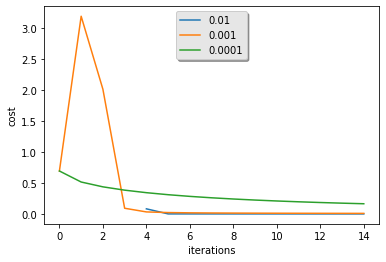

In [95]:
# COMPARING LEARNING RATES
learning_rates = [0.01, 0.001, 0.0001]
models = {}
for i in learning_rates:
    print ("learning rate is: " + str(i))
    models[str(i)] = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 1500, learning_rate = i, print_cost = False)
    print ('\n' + "-------------------------------------------------------" + '\n')

for i in learning_rates:
    plt.plot(np.squeeze(models[str(i)]["costs"]), label= str(models[str(i)]["learning_rate"]))

plt.ylabel('cost')
plt.xlabel('iterations')

legend = plt.legend(loc='upper center', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
plt.show()

In [98]:
def ownimage(my_image):
    ## START CODE HERE ## (PUT YOUR IMAGE NAME) 
    # my_image = "waifu.jpeg"   # change this to the name of your image file 
    ## END CODE HERE ##

    # We preprocess the image to fit your algorithm.
    fname = my_image
    # image = np.array(ndimage.imread(fname, flatten=False))
    image = np.array(matplotlib.pyplot.imread(fname))
    # my_image = scipy.misc.imresize(image, size=(num_px, num_px)).reshape((1, num_px * num_px * 3)).T
    my_image = skimage.transform.resize(image, (num_px, num_px)).reshape((1, num_px * num_px * 3)).T
    my_predicted_image = predict(d["w"], d["b"], my_image)

    plt.imshow(image)
    print("y = " + str(np.squeeze(my_predicted_image)) + ", your algorithm predicts a \"" + classes[int(np.squeeze(my_predicted_image)),].decode("utf-8") +  "\" picture.")

y = 0.0, your algorithm predicts a "messy" picture.


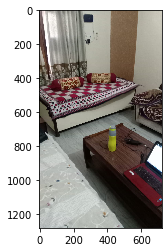

In [101]:
ownimage('naman.jpeg')

y = 0.0, your algorithm predicts a "messy" picture.


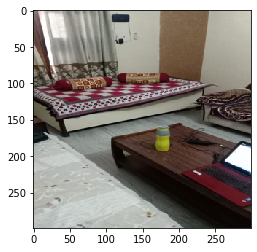

In [104]:
# change this to the name of your image file
my_image = "my_image.jpg"   

# We preprocess the image to fit your algorithm.
fname = "naman.jpeg"
image = np.array(Image.open(fname).resize((num_px, num_px)))
plt.imshow(image)
image = image / 255.
image = image.reshape((1, num_px * num_px * 3)).T
my_predicted_image = predict(d["w"], d["b"], image)

print("y = " + str(np.squeeze(my_predicted_image)) + ", your algorithm predicts a \"" + classes[int(np.squeeze(my_predicted_image)),].decode("utf-8") +  "\" picture.")

y = 0.0, your algorithm predicts a "messy" picture.


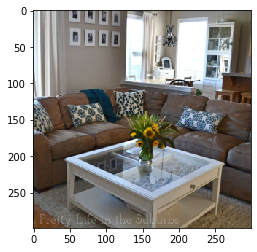

In [107]:
ownimage('images/test/0.png')